In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading dataset
salary_test= pd.read_csv('SalaryData_Test(1).csv')
salary_train = pd.read_csv('SalaryData_Train(1).csv')

In [3]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
df_sal_train= salary_train.copy()
df_sal_test= salary_test.copy()

In [4]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [5]:
object_col=['occupation','relationship','race','sex','native','workclass','education','maritalstatus']

In [6]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for i in object_col:
    salary_test[i]= label_encoder.fit_transform(salary_test[i])
    salary_train[i]= label_encoder.fit_transform(salary_train[i])

salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [7]:
salary_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
salary_train['Salary'] = salary_train['Salary'].replace({
    ' <=50K':0,
    ' >50K':1
})
salary_test['Salary'] = salary_test['Salary'].replace({
    ' <=50K':0,
    ' >50K':1
})


In [9]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


<AxesSubplot:>

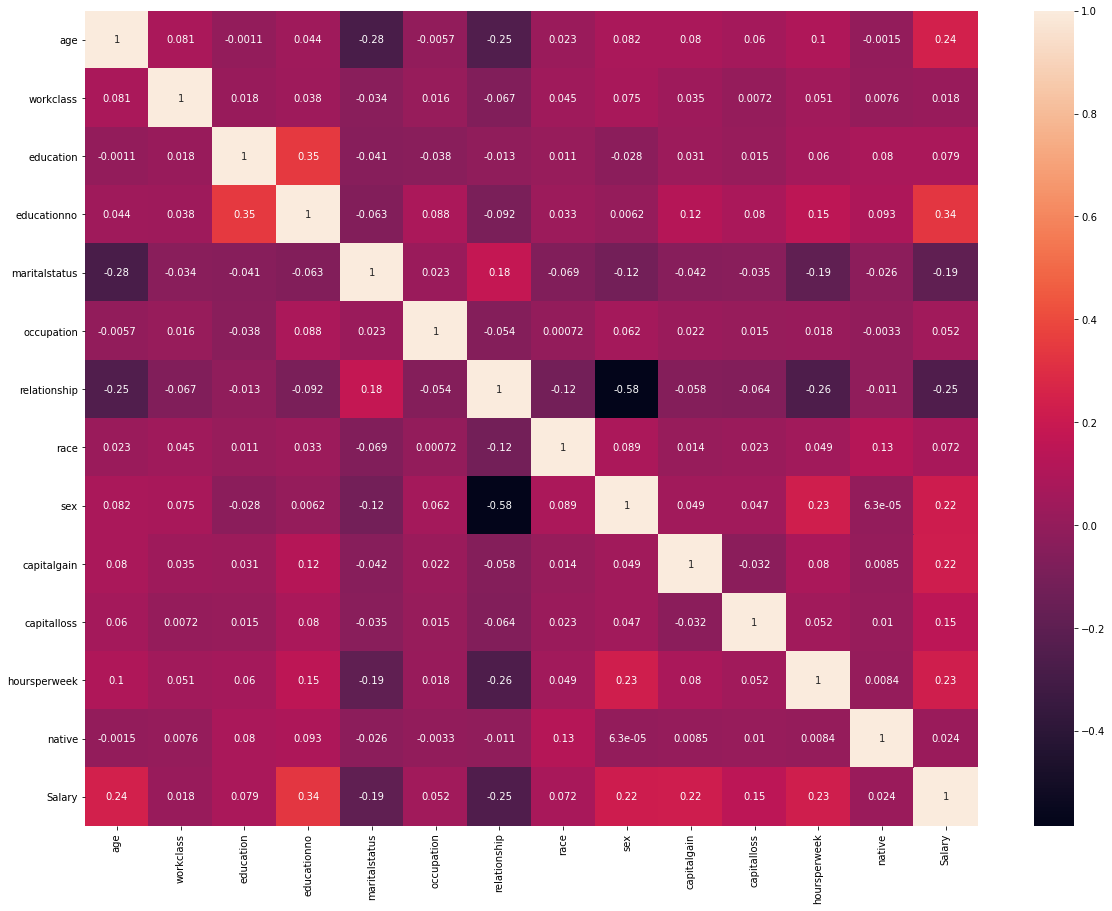

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(salary_train.corr(),annot=True)

As we can see from the heatmap that columns: workclass, education, occupation, race and native have lowest correllation. Hence we discate these columns

In [11]:
#Selecting the  columns with highest correllation
corr_col=['age','educationno','maritalstatus','relationship','sex',
          'capitalgain','capitalloss','hoursperweek','Salary']

salary_test=salary_test[corr_col]
salary_train= salary_train[corr_col]

In [12]:
#education:educationno
df_copy_edu=df_sal_train.copy()
df_copy_edu.set_index('education', inplace=True)
df_copy_edu.to_dict()['educationno']


{' Bachelors': 13,
 ' HS-grad': 9,
 ' 11th': 7,
 ' Masters': 14,
 ' 9th': 5,
 ' Some-college': 10,
 ' Assoc-acdm': 12,
 ' 7th-8th': 4,
 ' Doctorate': 16,
 ' Assoc-voc': 11,
 ' Prof-school': 15,
 ' 5th-6th': 3,
 ' 10th': 6,
 ' Preschool': 1,
 ' 12th': 8,
 ' 1st-4th': 2}

In [13]:
df_sal_train['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [14]:
#maritalstatus:Salary
df_copy_mari=df_sal_train.copy()
df_copy_mari.set_index('maritalstatus', inplace=True)
df_copy_mari.to_dict()['Salary']


{' Never-married': ' <=50K',
 ' Married-civ-spouse': ' >50K',
 ' Divorced': ' <=50K',
 ' Married-spouse-absent': ' <=50K',
 ' Separated': ' <=50K',
 ' Married-AF-spouse': ' >50K',
 ' Widowed': ' <=50K'}

In [15]:
#relationship:Salary
df_copy_rel=df_sal_train.copy()
df_copy_rel.set_index('sex', inplace=True)
df_copy_rel.to_dict()['Salary']


{' Male': ' <=50K', ' Female': ' >50K'}

<AxesSubplot:xlabel='age'>

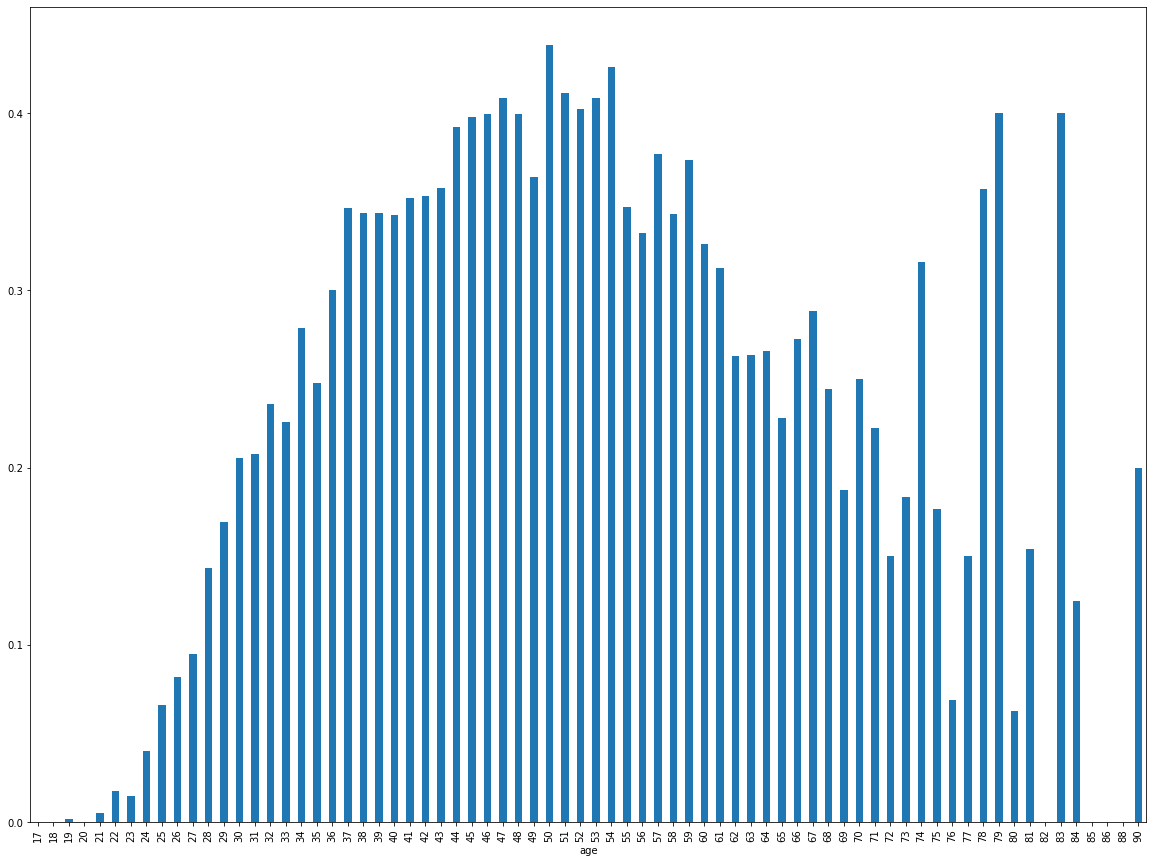

In [16]:
plt.figure(figsize=(20,15))
salary_train.groupby('age')['Salary'].mean().plot(kind='bar')

We can see that for the age group of 37-61, Salary is maximum

<AxesSubplot:xlabel='educationno'>

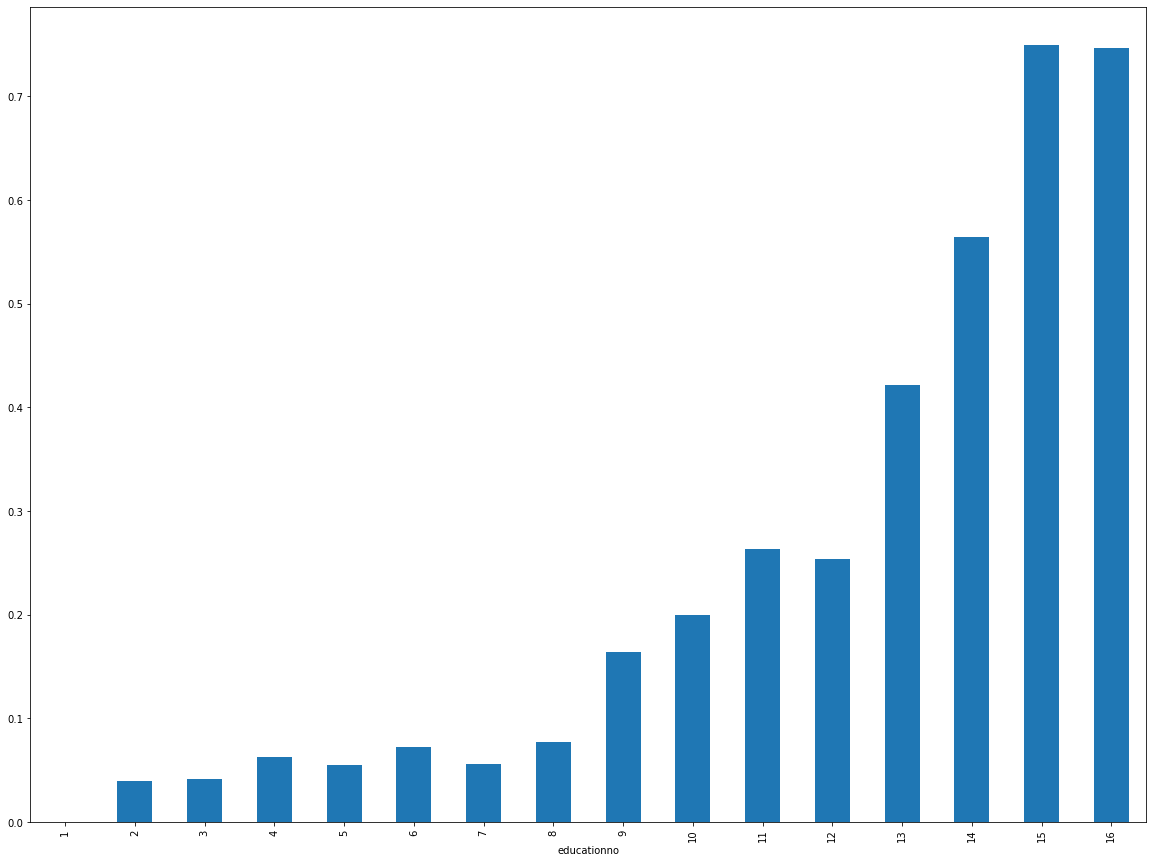

In [17]:
plt.figure(figsize=(20,15))
salary_train.groupby('educationno')['Salary'].mean().plot(kind='bar')

we can see that for Bachelors,Masters,Prof-school and Doctorate has higher salary compared to other educations. More specifically Prof-school and Doctorate have highest pay

<AxesSubplot:xlabel='maritalstatus'>

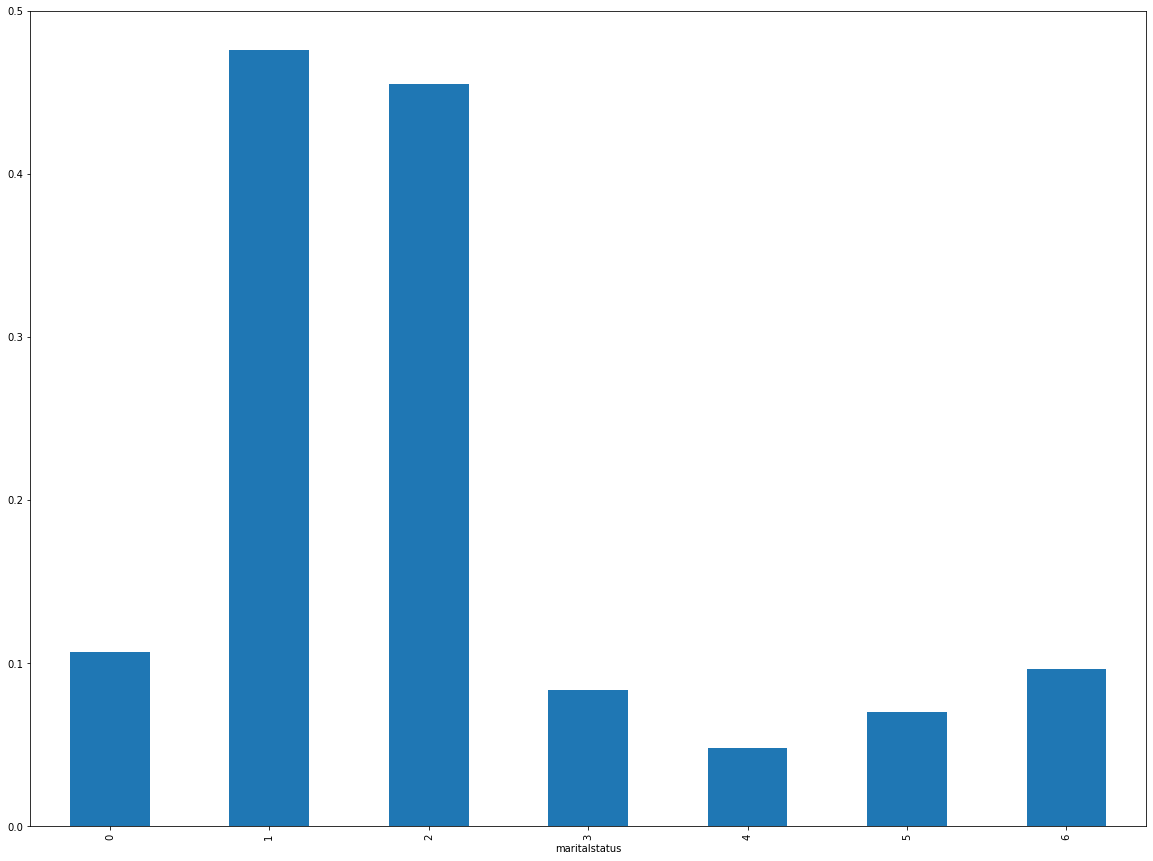

In [19]:
plt.figure(figsize=(20,15))
salary_train.groupby('maritalstatus')['Salary'].mean().plot(kind='bar')

we can see that Married-AF-spouse and Married-civ-spouse have highest pay above 50k amongst the maritalstatus group

<AxesSubplot:xlabel='sex'>

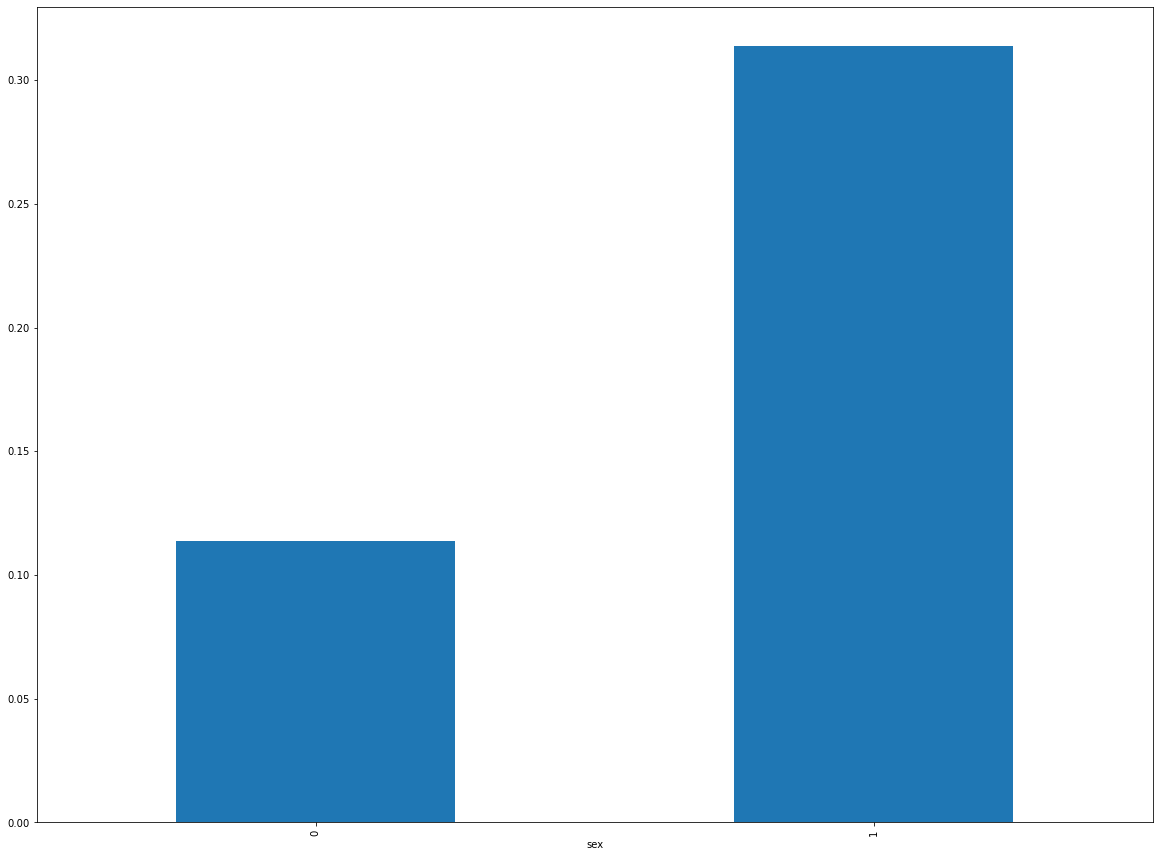

In [20]:
plt.figure(figsize=(20,15))
salary_train.groupby('sex')['Salary'].mean().plot(kind='bar')

Women are comparatively geting more Salary than men

In [22]:
#splitting the dataset
train_X=salary_train.iloc[:,0:8]
train_Y=salary_train.iloc[:,8]
test_x=salary_test.iloc[:,0:8]
test_y=salary_test.iloc[:,8]

### Naive Bayes

In [23]:
#Gaussian

from sklearn.naive_bayes import GaussianNB as GB

Gmodel= GB()
train_pred= Gmodel.fit(train_X,train_Y).predict(train_X)
test_pred = Gmodel.fit(train_X,train_Y).predict(test_x)

train_acc_GB = np.mean(train_pred==train_Y)
print(train_acc_GB)
test_acc_GB = np.mean(test_pred==test_y)
print(test_acc_GB)

0.7914525380458207
0.7917662682602922


In [24]:
#Multinomina

from sklearn.naive_bayes import MultinomialNB as MB

Mmodel=MB()
train_pred_MB = Mmodel.fit(train_X,train_Y).predict(train_X)
test_pred_MB=Mmodel.fit(train_X,train_Y).predict(test_x)

train_acc_MB= np.mean(train_pred_MB==train_Y)
print(train_acc_MB)
test_acc_MB = np.mean(test_pred_MB==test_y)
print(train_acc_MB)

0.7729186698053778
0.7729186698053778
